In [5]:
import time
import matplotlib.pyplot as plt

from bad_sorts import (
    create_near_sorted_list,
    insertion_sort2,
    bubble_sort,
    selection_sort
)


In [6]:
length = 5000
max_value = 5000
runs = 5

swaps_list = [0, 10, 50, 100, 250, 500, 1000]


In [7]:
ins_times = []
bub_times = []
sel_times = []

for swaps in swaps_list:
    ins_total = 0
    bub_total = 0
    sel_total = 0

    for _ in range(runs):
        L = create_near_sorted_list(length, max_value, swaps)

        A = L.copy()
        start = time.time()
        insertion_sort2(A)
        ins_total += time.time() - start

        A = L.copy()
        start = time.time()
        bubble_sort(A)
        bub_total += time.time() - start

        A = L.copy()
        start = time.time()
        selection_sort(A)
        sel_total += time.time() - start

    ins_times.append(ins_total / runs)
    bub_times.append(bub_total / runs)
    sel_times.append(sel_total / runs)


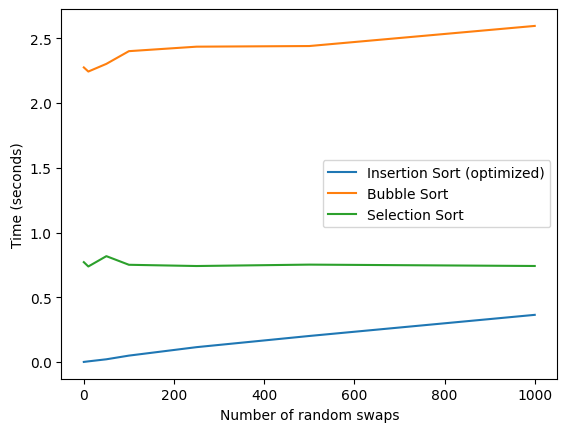

In [11]:
plt.figure()
plt.plot(swaps_list, ins_times, label="Insertion Sort (optimized)")
plt.plot(swaps_list, bub_times, label="Bubble Sort")
plt.plot(swaps_list, sel_times, label="Selection Sort")

plt.xlabel("Number of random swaps")
plt.ylabel("Time (seconds)")
plt.legend()
plt.savefig("experiment3_graph.png", dpi=300)
plt.show()
